In [ ]:
# Name : T.Anil
# Roll No : AM.EN.U4CSE19357
# Batch : CSE-D

                                MACHINE LEARNING PROJECT PHASE 2 
                              SUPERVISED/Unsupervised LEARNING ALGORITHMS 

1. Problem Definition
Give a concrete description of your machine learning problem in no
more than 50 words 

A sales forecast is a prediction of future sales revenue. Sales forecasts are usually based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals.In this project we are looking at TV sales forecasting.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from csv import reader
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import r2_score

In [24]:
data=pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,Date,Model,Count,Normalized Count
0,0,31-Aug-16,M45,5,-0.291022
1,1,31-Aug-16,M121,3,-0.297370
2,2,31-Aug-16,M122,4,-0.294196
3,3,31-Aug-16,M91,10,-0.275152
4,4,31-Aug-16,M66,57,-0.125975


In [25]:
data.isnull().values.any()

False

In [26]:
data.describe()

,Unnamed: 0,Count,Normalized Count
count,46116.000000,46116.000000,4.611600e+04
mean,23057.500000,96.690108,8.241100e-15
std,13312.686844,315.065946,1.000011e+00
min,0.000000,1.000000,-3.037178e-01
25%,11528.750000,3.000000,-2.973699e-01
50%,23057.500000,14.000000,-2.624562e-01
75%,34586.250000,67.000000,-9.423560e-02
max,46115.000000,6678.000000,2.088890e+01


In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
categ=['Date','Model']
data[categ] = data[categ].apply(label.fit_transform)

In [28]:
data.head()

,Unnamed: 0,Date,Model,Count,Normalized Count
0,0,954,66,5,-0.291022
1,1,954,25,3,-0.297370
2,2,954,26,4,-0.294196
3,3,954,115,10,-0.275152
4,4,954,88,57,-0.125975


In [29]:
X=data.iloc[:,1:3].values
y=data.iloc[:,3].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(36892, 2)
(36892,)
(4612, 2)
(4612,)
(4612, 2)
(4612,)


                            Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([ 33.,  87., 229., ...,  33.,  12.,  11.])

In [33]:
dt_acc=clf.score(X_test,y_test)
dt_acc

0.14280982144916687

In [34]:
acc_list=[]
n_es=[i for i in range(1,11)]
for i in n_es:
    dt=DecisionTreeRegressor(random_state=i)
    dt.fit(X_train,y_train)
    acc_list.append(dt.score(X_test,y_test))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


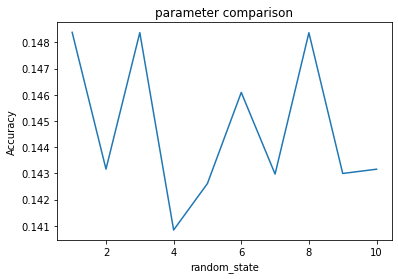

In [35]:
sns.lineplot(n_es,acc_list)
plt.title('parameter comparison')
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.show()

                                Random Forest Regressor 

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
y_pred

array([ 43.4,  71.1,  97.9, ..., 118.8,  63.3,   8.5])

In [37]:
rfr_acc=rfr.score(X_test,y_test)
rfr_acc

0.3683800010715329

In [38]:
acc_list=[]
n_es=[i for i in range(1,11)]
for i in n_es:
    rf=RandomForestRegressor(n_estimators=i,random_state=0)
    rf.fit(X_train,y_train)
    acc_list.append(rf.score(X_test,y_test))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


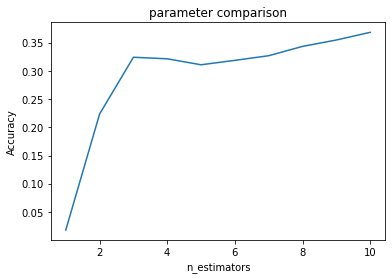

In [39]:
sns.lineplot(n_es,acc_list)
plt.title('parameter comparison')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

                           Linear regression

In [40]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

In [41]:
expected = y_test
predicted = linear.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r_square=r2_score(expected,predicted)
print(r_square)

0.006318755294304923


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


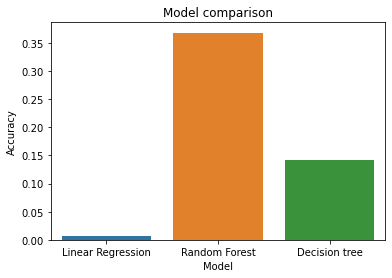

In [48]:
sns.barplot(['Linear Regression','Random Forest','Decision tree'],[r_square,rfr_acc,dt_acc])
plt.title('Model comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [49]:
print("Acurracy Score on test data : \n\t")
print("Decision Tree : ",dt_acc)
print("Random Forest : ",rfr_acc)
print("Linear Regression : ",r_square)

Acurracy Score on test data : 
	
Decision Tree :  0.14280982144916687
Random Forest :  0.3683800010715329
Linear Regression :  0.006318755294304923


In [50]:
y_valid=rfr.predict(X_valid)
y_valid

array([  6.3,  78.3,   8. , ..., 122.3,  18.3,  58. ])

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X_valid,y_valid)
y_pred=rfr.predict(X_valid)
y_pred

array([ 29.25, 160.54,  12.39, ...,  99.27,  15.14,  38.33])

In [57]:
rfr_acc=rfr.score(X_valid,y_valid)
rfr_acc

0.9691762121328934

In [58]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(X_valid,y_valid)
y_pred=clf.predict(X_valid)
y_pred

array([  6.3,  78.3,   8. , ..., 122.3,  18.3,  58. ])

In [59]:
dt_acc=clf.score(X_valid,y_valid)
dt_acc

1.0

In [60]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [61]:
expected = y_valid
predicted = linear.predict(X_valid)

In [62]:
from sklearn.metrics import r2_score
r_square=r2_score(expected,predicted)
print(r_square)

0.007038336250586363


In [63]:
print("Acurracy Score on test data : \n\t")
print("Decision Tree : ",dt_acc)
print("Random Forest : ",rfr_acc)
print("Linear Regression : ",r_square)

Acurracy Score on test data : 
	
Decision Tree :  1.0
Random Forest :  0.9691762121328934
Linear Regression :  0.007038336250586363
